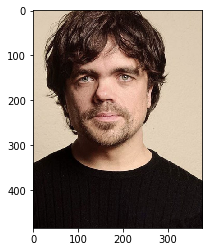

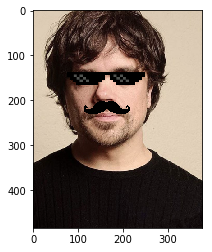

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from utils import image_resize
import time







face_cascade        = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_default.xml')
eyes_cascade        = cv2.CascadeClassifier('cascades/third-party/frontalEyes35x16.xml')
nose_cascade        = cv2.CascadeClassifier('cascades/third-party/Nose18x15.xml')
glasses             = cv2.imread("images/fun/glasses.png", -1)
mustache            = cv2.imread('images/fun/mustache.png',-1)
img                 = cv2.imread('1.png')






imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
frame = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA) #rgba is used for making the object transparent,translucent,opaque.





for (x, y, w, h) in faces:
        roi_gray    = gray[y:y+h, x:x+w] # rec
        roi_color   = frame[y:y+h, x:x+w] #region of interest
        #cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

        eyes = eyes_cascade.detectMultiScale(roi_gray, scaleFactor=5, minNeighbors=3)
        for (ex, ey, ew, eh) in eyes:
            #cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 3)
            roi_eyes = roi_gray[ey: ey + ew, ex: ex + eh]
            glasses2 = image_resize(glasses.copy(), width=eh)

            gw, gh, gc = glasses2.shape
            for i in range(0, gw):
                for j in range(0, gh):
                    #print(glasses[i, j]) #RGBA
                    if glasses2[i, j][3] != 0: # alpha 0
                        roi_color[ey + i, ex + j] = glasses2[i, j]
                        #roi_color[ey + i+int(gh/2), ex + j+int(gw/2)] = glasses2[i, j]###


        nose = nose_cascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=5)
        for (nx, ny, nw, nh) in nose:
            #cv2.rectangle(roi_color, (nx, ny), (nx + nw, ny + nh), (255, 0, 0), 3)
            roi_nose = roi_gray[ny: ny + nh, nx: nx + nw]
            mustache2 = image_resize(mustache.copy(), width=int(2.0*nw)) ####

            mw, mh, mc = mustache2.shape
            
            for i in range(0, mw):
                for j in range(0, mh):
                    #print(glasses[i, j]) #RGBA
                    if mustache2[i, j][3] != 0: # alpha 0
                        #roi_color[ny + int(nh/2.0) + i, nx + j-int(mw/4)] = mustache2[i, j]
                        roi_color[ny + int(nh/2.5) + i, nx + j-int(mw/4)] = mustache2[i, j]


                        
                        
# Display the resulting frame
frame1 = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)
#cv2.imshow('frame',frame1)


frame2 = cv2.cvtColor(frame, cv2.COLOR_BGRA2RGB)


####################
frame3=np.array(frame2,dtype="float32")
###################

frame2= np.array(frame2,dtype="float32")/255.

flattened=frame2.flatten()
flattened = flattened.reshape(-1,3)

# saving second format of the file which is normalised from 0.00 to 1.00 only
# This is not for submission
np.savetxt("1.csv", flattened, fmt="%1.2f", delimiter=",")



################
# storing rgb in csv file in decimal format from 0 to 255 max for each R, G,  B

flattened3=frame3.flatten()
flattened3=flattened3.reshape(-1,3)
np.savetxt("2.csv",  flattened3,fmt="%3.0f" , delimiter=",")
################





plt.imshow(imgrgb)
plt.show()


plt.imshow(frame2)
plt.show()





#  Show in Frame
cv2.imshow('frame',frame)

cv2.waitKey(0)    
cv2.destroyAllWindows()




In [6]:
print(imgrgb)

[[[219 202 180]
  [220 203 181]
  [219 202 180]
  ...
  [215 197 175]
  [216 199 174]
  [214 199 173]]

 [[219 202 180]
  [220 203 181]
  [219 202 180]
  ...
  [215 198 176]
  [216 199 175]
  [214 199 173]]

 [[219 202 180]
  [220 203 181]
  [219 202 180]
  ...
  [215 198 176]
  [216 199 175]
  [214 199 173]]

 ...

 [[  6   2   1]
  [  5   1   0]
  [  6   2   1]
  ...
  [ 27  21  21]
  [ 26  20  20]
  [ 17  10  10]]

 [[  7   3   2]
  [  6   2   1]
  [  5   1   0]
  ...
  [ 22  16  16]
  [ 21  15  15]
  [ 22  16  16]]

 [[  7   3   2]
  [  5   1   0]
  [  5   1   0]
  ...
  [ 19  13  13]
  [ 21  15  15]
  [ 22  15  15]]]
